In [1]:
import pandas as pd
import numpy as np
import io
from google.colab import files

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
uploaded = files.upload()

Saving dw_inventory.csv to dw_inventory.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['dw_inventory.csv']))
df.drop(['date_id-2'], axis=1, inplace=True)
df.drop(['date_id'], axis=1, inplace=True)
df.head()

,store_id,product_id,quantity,day_of_month,month,year,day_of_week,day_of_year,hour_of_day,quarter
0,1,12,15,16,6,2021,4,167,11,2
1,2,8,9,16,6,2021,4,167,11,2
2,1,19,15,16,6,2021,4,167,12,2
3,2,17,10,16,6,2021,4,167,12,2
4,1,23,17,16,6,2021,4,167,13,2


In [6]:
df2 = df[df.product_id==1]
df2.head()

,store_id,product_id,quantity,day_of_month,month,year,day_of_week,day_of_year,hour_of_day,quarter
15,1,1,15,17,6,2021,5,168,10,2
28,2,1,10,17,6,2021,5,168,17,2
59,2,1,12,20,6,2021,1,171,17,2
133,2,1,7,27,6,2021,1,178,19,2
154,2,1,18,29,6,2021,3,180,16,2


In [ ]:
data = df2[['day_of_year','quantity']].groupby(by='day_of_year', as_index=False).agg('sum')
for i in range(1, len(data)):
  data.loc[i,'quantity'] = data.loc[i,'quantity']  + data.loc[i-1,'quantity'] 

In [ ]:
data.head()

,day_of_year,quantity
0,168,44
1,169,57
2,170,71
3,171,97
4,172,131


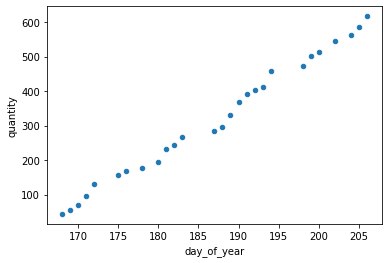

In [ ]:
# Scatter Plot: Linear AF
data.plot(kind='scatter',x='day_of_year',y='quantity')
plt.show()

In [ ]:
# Reshape
x = data.day_of_year.values.reshape(-1,1)
y = data.quantity.values

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1)

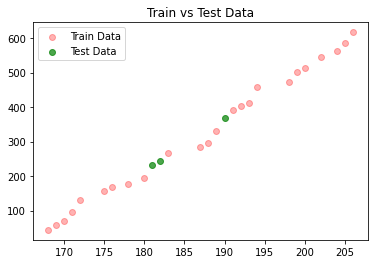

In [ ]:
# Plot train vs test
plt.scatter(x_train, y_train, label='Train Data', color='r', alpha=.3)
plt.scatter(x_test, y_test, label='Test Data', color='g', alpha=.7)
plt.legend()
plt.title('Train vs Test Data')
plt.show()

In [ ]:
# Regresion Lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Calcular Predicciones
pred = model.predict(x_test)

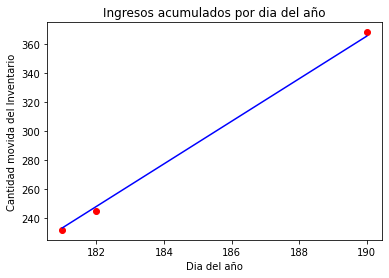

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, pred, color = 'blue')
plt.title('Movimiento de Producto Por Año')
plt.xlabel('Dia del año')
plt.ylabel('Cantidad movida del Inventario')
plt.show()

In [ ]:
# R-cuadrado
from sklearn.metrics import r2_score
print('R^2:',r2_score(y_test, pred))

R^2: 0.9983370951382305
